## Import Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Import Dataset

In [2]:
wine = load_wine()
data = pd.DataFrame(wine.data, columns = wine.feature_names)
data['target'] = wine.target

## Train / Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data[wine.feature_names],data['target'], test_size=0.2,random_state=42)
print(data.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

### Check Out Features For Class 0 And See Histogram Plot For Observing Distribution

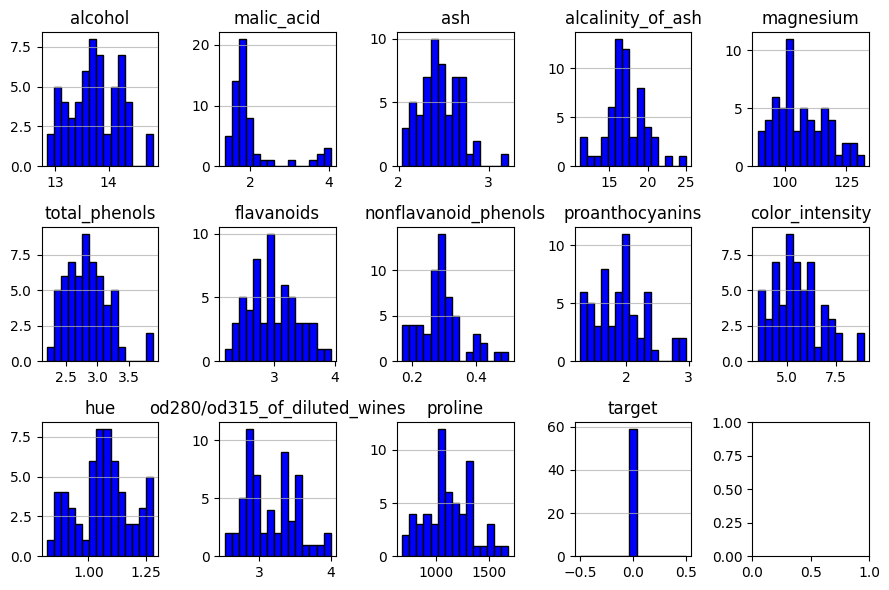

In [4]:
figure, axis = plt.subplots(3, 5, figsize=(9, 6))

for i, feature in enumerate(data.columns):
        row, col = divmod(i, 5)
        axis[row, col].hist(data[data['target'] == 0][feature], bins=15, color='blue', edgecolor='black')
        axis[row, col].set_title(feature)
        axis[row, col].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

#### Check Out Features For Class 1 And See Histogram Plot For Observing Distribution

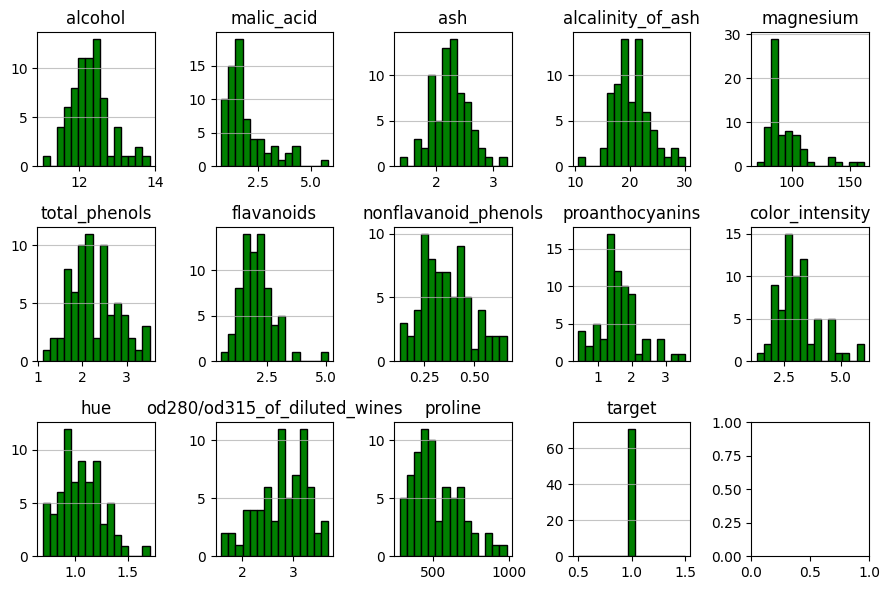

In [5]:
figure, axis = plt.subplots(3, 5, figsize=(9, 6))

for i, feature in enumerate(data.columns):
        row, col = divmod(i, 5)
        axis[row, col].hist(data[data['target'] == 1][feature], bins=15, color='green', edgecolor='black')
        axis[row, col].set_title(feature)
        axis[row, col].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

#### Check Out Features For Class 2 And See Histogram Plot For Observing Distribution

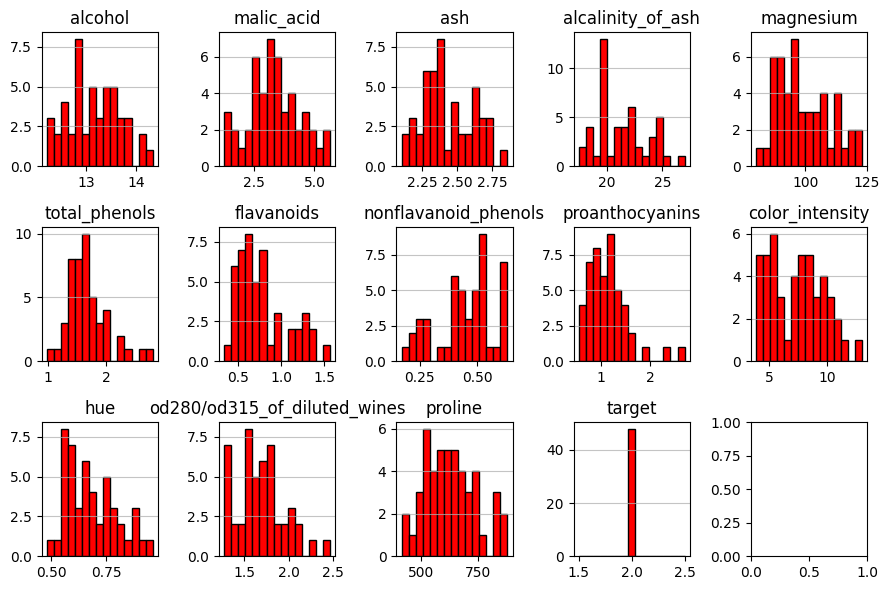

In [6]:
figure, axis = plt.subplots(3, 5, figsize=(9, 6))

for i, feature in enumerate(data.columns):
        row, col = divmod(i, 5)
        axis[row, col].hist(data[data['target'] == 2][feature], bins=15, color='red', edgecolor='black')
        axis[row, col].set_title(feature)
        axis[row, col].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

#### Check Out Features For All Classes And View The Histogram Chart By Feature To See The Distribution.

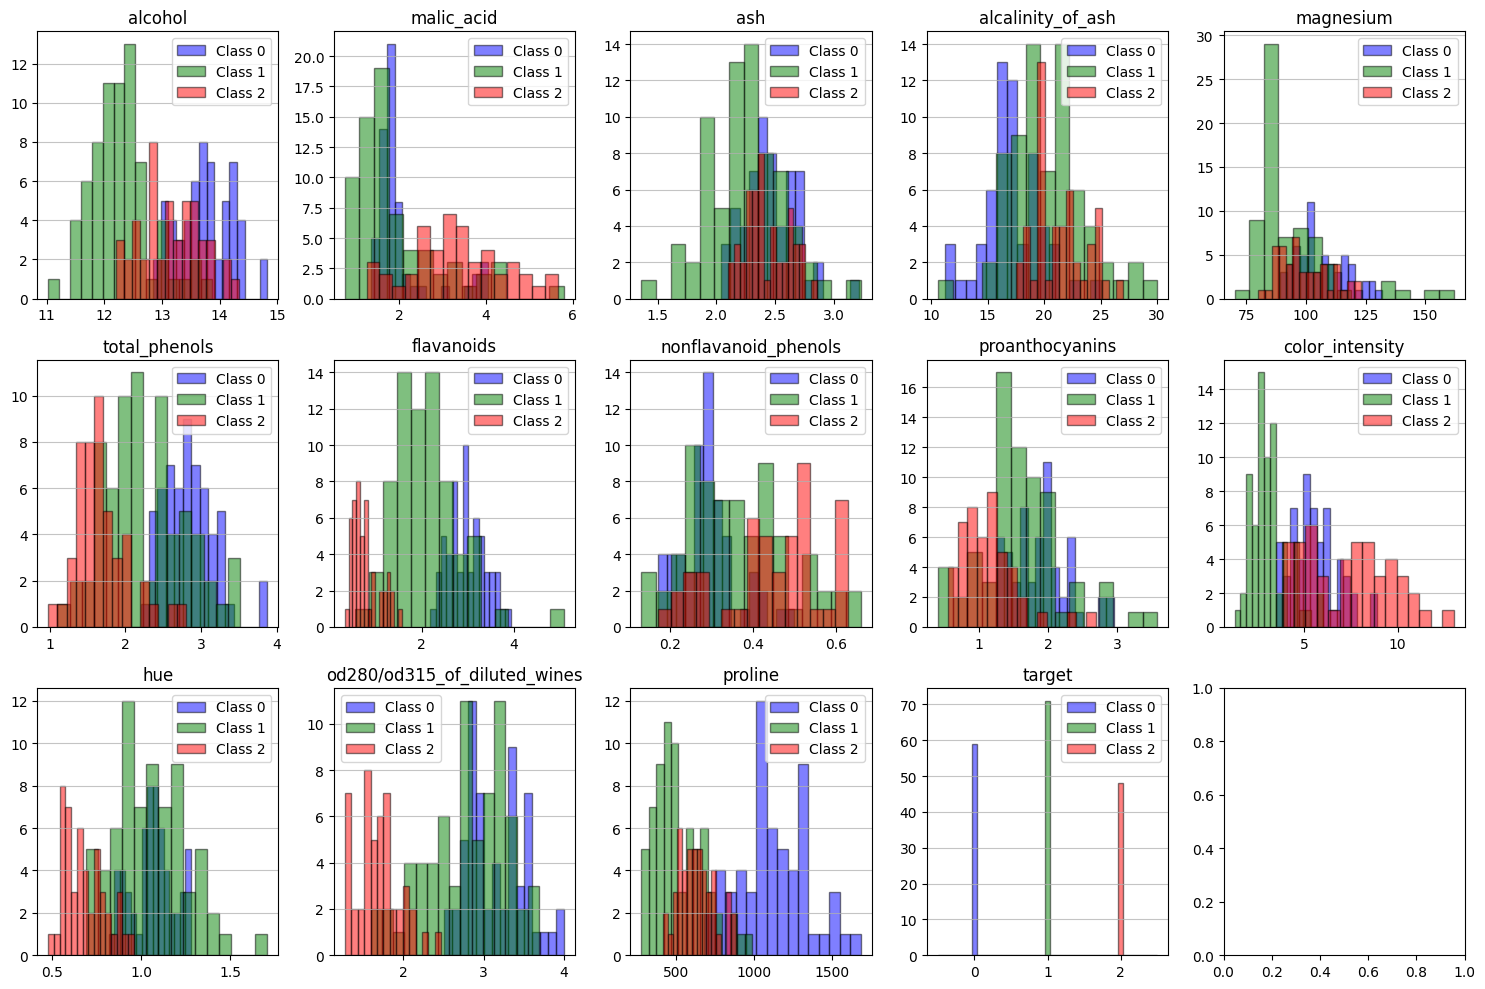

In [7]:
figure, axis = plt.subplots(3, 5, figsize=(15, 10))
for i, feature in enumerate(data.columns):
    row, col = divmod(i, 5)
    for target, color in zip(data['target'].unique(), ['blue', 'green', 'red']):
        axis[row, col].hist(data[data['target'] == target][feature], bins=15, color=color, alpha=0.5, edgecolor='black', label=f'Class {target}')
    axis[row, col].set_title(feature)
    axis[row, col].grid(axis='y', alpha=0.75)
    axis[row, col].legend()
plt.tight_layout()
plt.show()

### Initialize and fit the LDA model

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Predict using the LDA model And Calculate accuracy for LDA

In [9]:
y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, lda.predict(X_test))
print (accuracy_score(y_test, lda.predict(X_test)))

1.0


### Classification report and confusion matrix for LDA

In [10]:
print('Classification report:\n',classification_report(y_test, y_pred_lda))
print('Confusion Matrix is:\n',confusion_matrix(y_test, y_pred_lda))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix is:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Initialize and fit the KNN model with k=5

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Predict using the KNN model

In [12]:
y_pred_knn = knn.predict(X_test)

### Calculate accuracy for KNN

In [13]:
accuracy_knn = round(accuracy_score(y_test, y_pred_knn),2)
print(accuracy_knn)

0.72


### Classification report and confusion matrix for KNN

In [14]:
print('KNN Classification Report:\n',classification_report(y_test, y_pred_knn))
print('KNN Confusion Matrix:\n',confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36

KNN Confusion Matrix:
 [[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]


### Values of k to test

In [15]:
k_values = [1, 3, 5, 10, 15, 20]
accuracies = []

### Train KNN models for each value of k and calculate accuracy

In [16]:
accuracy_knn = round(accuracy_score(y_test, knn.predict(X_test)),2)
print(accuracy_knn)

0.72


In [17]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(round(accuracy_score(y_test, knn.predict(X_test)),2))
    print(round(accuracy_score(y_test, knn.predict(X_test)),2))

0.78
0.81
0.72
0.72
0.75
0.78


### Plotting the results

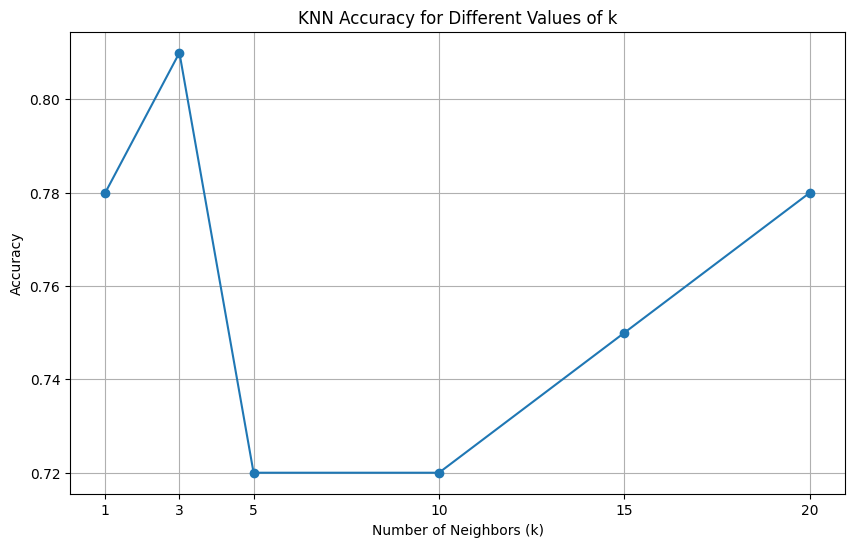

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

### Initialize and fit the Naive Bayes model

In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

### Predict using the Naive Bayes model

In [20]:
y_pred_nb = nb_model.predict(X_test)

### Calculate accuracy for Naive Bayes


In [21]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(accuracy_nb)

1.0


### Classification report and confusion matrix for Naive Bayes


In [22]:
print('Naive Bayes Classification Report:\n',classification_report(y_test, y_pred_nb, target_names=wine.target_names))
print('Naive Bayes Confusion Matrix:\n',confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Naive Bayes Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


### Visualizing the accuracies of all models

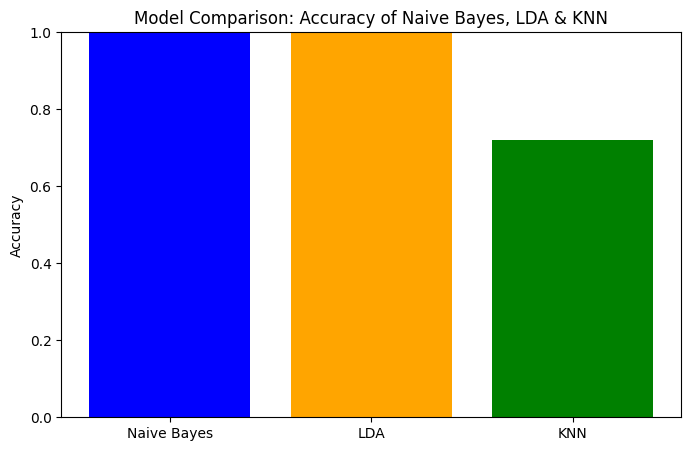

In [23]:
plt.figure(figsize=(8, 5))
plt.bar(['Naive Bayes', 'LDA', 'KNN'], [accuracy_nb, accuracy_lda, accuracy_knn], color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy of Naive Bayes, LDA & KNN')
plt.show()